## Term structures and their reference
Dates

## SETUP

In [1]:
from QuantLib import *

In [2]:
Settings.instance().evaluationDate = Date(3, October, 2024)

## Specifying the reference date of a term structure

 In not-too-accurate terms, the reference date of a term structure is where it begins. It can be the
evaluation date, but you might also want it to start on the spot date, for instance.

We have two possibilities to define a reference date for a curve—even though some particular classes
only allow one of them.
                                                    
The first is to define it by means of a (possibly null) offset from the current evaluation date; e.g.,
“two business days after the evaluation date” to define it as the spot date, or “no business days” to
define it as the evaluation date itself. I’ll do it here by building a sample curve over a few swaps.

Never mind the helper object that I’m building here.

In [4]:
from QuantLib import *

helpers = [ SwapRateHelper(QuoteHandle(SimpleQuote(rate/100.0)),
                           Period(*tenor), TARGET(),
                           Annual, Unadjusted,
                           Thirty360(Thirty360.BondBasis),  # Provide the convention argument
                           Euribor6M())
           for tenor, rate in [((2, Years), 0.201),
                               ((3, Years), 0.258),
                               ((5, Years), 0.464),
                               ((10, Years), 1.151),
                               ((15, Years), 1.588)] ]


In [5]:
curvel = PiecewiseFlatForward(0, TARGET(), helpers, Actual360())

In [6]:
dates, rates = zip(*curvel.nodes())

In [7]:
curvel.nodes()

((Date(3,10,2024), 0.001980476041110911),
 (Date(7,10,2026), 0.001980476041110911),
 (Date(7,10,2027), 0.003667536804779306),
 (Date(8,10,2029), 0.007618799130020174),
 (Date(9,10,2034), 0.018415644708941643),
 (Date(7,10,2039), 0.02535386593054697))

In [8]:
curve2 = ForwardCurve(dates, rates, Actual360())

In [15]:
curvel = PiecewiseFlatForward(0, TARGET(), helpers, Actual360())  # Assuming PiecewiseFlatForward, TARGET, helpers, Actual360 are already defined
dates, rates = zip(*curvel.nodes())
curvel.nodes()
curve2 = ForwardCurve(dates, rates, Actual360())  # Assuming ForwardCurve, Actual360 are already defined
print("{0} to {1}".format(curvel.referenceDate(), curvel.maxDate()))  # Changed curve1 to curvel
print("{0} to {1}".format(curve2.referenceDate(), curve2.maxDate()))

October 3rd, 2024 to October 7th, 2039
October 3rd, 2024 to October 7th, 2039


In [17]:
print(curvel.zeroRate(5.0, Continuous))  # Changed curve1 to curvel
print(curve2.zeroRate(5.0, Continuous))

0.451839 % Actual/360 continuous compounding
0.451839 % Actual/360 continuous compounding


In [19]:
import QuantLib as ql

# ... (your existing code to define helpers, curvel, etc.) ...

# Get the reference date of curvel
reference_date = curvel.referenceDate()

# Target date
target_date = ql.Date(7, ql.September, 2024)

# Check if the target date is before the reference date
if target_date < reference_date:
    print("Error: Target date is before the reference date of the curve.")
    # Handle the error appropriately, e.g., by choosing a later target date
else:
    # Calculate the zero rate if the target date is valid
    print(curvel.zeroRate(target_date, ql.Actual360(), ql.Continuous))

Error: Target date is before the reference date of the curve.


In [22]:
!pip install utils
import utils
from matplotlib.ticker import FuncFormatter
import numpy as np

Defaulting to user installation because normal site-packages is not writeable


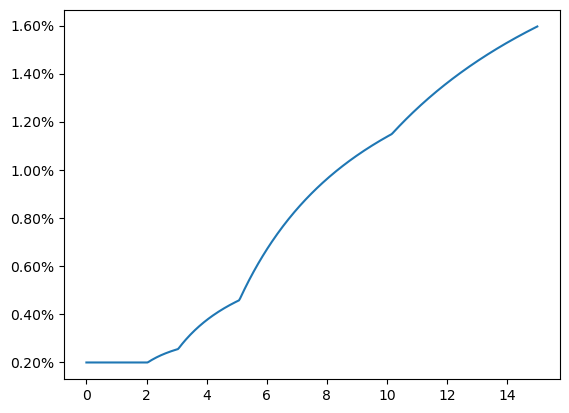

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# ... (your existing code to define helpers, curvel, etc.) ...

times = np.linspace(0.0, 15.0, 400)
rates = [curvel.zeroRate(t, Continuous).rate() for t in times]

# Create a figure and an axes object using matplotlib.pyplot
fig, ax = plt.subplots()  

ax.yaxis.set_major_formatter(
    FuncFormatter(lambda r, pos: "{:.2f}%".format(r * 100))  # Format rate as percentage
)
ax.plot(times, rates)
plt.show()  # Display the plot

## Moving the evaluation date

In [24]:
Settings.instance().evaluationDate = Date(19, September, 2024)

In [29]:
import QuantLib as ql

# ... (Your existing code to define helpers, deposit rates, etc.) ...

# Assuming you have defined curvel, and want it to be curve1 instead
curve1 = curvel  

# Similarly, define curve2 if needed
# curve2 = ... # Replace ... with appropriate construction of curve2


print("{0} to {1}".format(curve1.referenceDate(), curve1.maxDate()))
print("{0} to {1}".format(curve2.referenceDate(), curve2.maxDate()))

September 19th, 2024 to September 23rd, 2039
October 3rd, 2024 to October 7th, 2039


In [30]:
print(curve1.zeroRate(5.0, Continuous))
print(curve2.zeroRate(5.0, Continuous))

0.451839 % Actual/360 continuous compounding
0.451839 % Actual/360 continuous compounding


In [33]:
import QuantLib as ql

# ... (Your existing code to define helpers, deposit rates, etc.) ...

# Assuming you have defined curvel, and want it to be curve1 instead
curve1 = curvel

# Similarly, define curve2 if needed
# curve2 = ... # Replace ... with appropriate construction of curve2

# Get the evaluation date (reference date)
evaluation_date = ql.Settings.instance().evaluationDate

# Ensure the date for zero rate calculation is not before the evaluation date
date_for_zero_rate = ql.Date(7, September, 2024)
if date_for_zero_rate < evaluation_date:
    print("Warning: Date for zero rate calculation is before the evaluation date. "
          "Using evaluation date instead.")
    date_for_zero_rate = evaluation_date

# Calculate day count fraction instead of using date directly
day_count_fraction = ql.Actual360().yearFraction(evaluation_date, date_for_zero_rate)

print(curve1.zeroRate(day_count_fraction, ql.Continuous)) # Pass day count fraction
print(curve2.zeroRate(day_count_fraction, ql.Continuous)) # Pass day count fraction

0.198048 % Actual/360 continuous compounding
0.198048 % Actual/360 continuous compounding


In [34]:
def make_observer(i):
    def say():
        s = "Observer %d notified" % i
        print('-'*len(s))
        print(s)
        print('-'*len(s))
    return Observer(say)

obs1 = make_observer(1)
obs2 = make_observer(2)

In [37]:
q1 = SimpleQuote(1.0)
obs1.registerWith(q1)

q2 = SimpleQuote(2.0)
obs2.registerWith(q2)

q3 = SimpleQuote(3.0)
obs1.registerWith(q3) # Changed 'obs' to 'obs1' or 'obs2' as intended
obs2.registerWith(q3)

In [39]:
q1.setValue(1.5)

-------------------
Observer 1 notified
-------------------


In [40]:
q2.setValue(1.9)

-------------------
Observer 2 notified
-------------------


In [41]:
q3.setValue(3.1)

-------------------
Observer 2 notified
-------------------
-------------------
Observer 1 notified
-------------------


In [42]:
obs1.registerWith(curve1)
obs2.registerWith(curve2)

In [45]:
Settings.instance().evaluationdate = Date(23, September, 2014)